In [1]:
import torch
from prepare_data import load_data
from matplotlib import pyplot as plt
import random
device = 'cpu'

In [2]:
data = load_data()
train_ham = torch.tensor(data['train']['ham'])
test_ham = torch.tensor(data['test']['ham'])
train_spam = torch.tensor(data['train']['spam'])
test_spam = torch.tensor(data['test']['spam'])

In [3]:
def norm(vec: torch.Tensor):
    return sum(abs(vec))
def normalize_tensor(tensor: torch.Tensor):
    """Normalize a tensor in place."""
    m, n = tensor.size()
    for i in range(n):
        colnorm = norm(tensor[:,i])
        if colnorm > 0:
            tensor[:,i] /= colnorm
        else:
            #this should already be true if colnorm is 0
            tensor[:,i] = 0

In [4]:
train_ham.size()

torch.Size([3312, 46])

In [13]:
#normalize_tensor(train_ham)
#normalize_tensor(train_spam)
#normalize_tensor(test_ham)
#normalize_tensor(test_spam)

In [14]:
train_batch = torch.cat((train_ham, train_spam))
train_target = torch.cat((
    torch.ones(train_ham.size()[0],1),
    torch.zeros(train_spam.size()[0],1)
))
num_train_rows = train_target.size()[0]

In [15]:
from model import BasicNet
net = BasicNet()
net = net.to(device)

print(net)

BasicNet(
  (dense1): Linear(in_features=46, out_features=32, bias=True)
  (dense2): Linear(in_features=32, out_features=32, bias=True)
  (dense3): Linear(in_features=32, out_features=1, bias=True)
  (act1): Sigmoid()
  (act2): Sigmoid()
  (act3): Sigmoid()
)


In [47]:
#training time!
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters())

if not 'epoch_loss_list' in locals():
    epoch_loss_list = [];
max_epochs = 10000


for E in range(max_epochs):
    #shuffle batch before each epoch
    shuffle_index = list(range(num_train_rows))
    random.shuffle(shuffle_index)
    train_batch = train_batch[shuffle_index]
    train_target = train_target[shuffle_index]
    
    optimizer.zero_grad()
    output = net(train_batch)
    loss = criterion(output,train_target)
    loss.backward()
    epoch_loss = output.shape[0] * loss.item()
    optimizer.step()
    epoch_loss_list.append(epoch_loss)
    print(epoch_loss)

636.3200980871916
711.0378660410643
640.9643376767635
653.0429336875677
678.818605363369
664.3005527257919
641.3281545639038
637.0768842995167
649.4288623183966
657.8135466724634
652.5909670293331
641.4645685851574
635.9221430718899
639.6588485687971
646.2055444121361
647.401279091835
642.4958447366953
637.0955113917589
636.1993335932493
639.4396859407425
642.3446813821793
641.6477926969528
638.3838968127966
636.0197795033455
636.5684131532907
638.7153067141771
639.6635572761297
638.3910983651876
636.4601128846407
635.8928521424532
636.9105561375618
637.9698767960072
637.7525838017464
636.5947957634926
635.8450033664703
636.1862461566925
636.9435863345861
637.0687825530767
636.4391314387321
635.8576753288507
635.9440247118473
636.4139260053635
636.5688978731632
636.217406719923
635.8319851756096
635.8544900268316
636.1440755277872
636.2433046102524
636.0194332748652
635.7848981022835
635.8167511224747
635.9966514408588
636.0307895690203
635.8726323992014
635.7443893700838
635.792653620

630.8880502134562
630.8735086172819
630.8588285297155
630.8442176878452
630.8295376002789
630.8147882670164
630.80010817945
630.7854280918837
630.7706787586212
630.7557216882706
630.7409031093121
630.7264307588339
630.7114044427872
630.6967936009169
630.6818365305662
630.6670179516077
630.6521301269531
630.6372423022985
630.622354477644
630.6074666529894
630.5925788283348
630.5776217579842
630.5625954419374
630.5477768629789
630.5328197926283
630.5177242308855
630.5026979148388
630.4878100901842
630.4725067913532
630.4575497210026
630.4425926506519
630.4276355803013
630.4124707728624
630.3973752111197
630.3820719122887
630.367114841938
630.3519500344992
630.3366467356682
630.3216896653175
630.3062478750944
630.2908753305674
630.2757105231285
630.2606149613857
630.2452424168587
630.2300083637238
630.2147050648928
630.1994017660618
630.1841677129269
630.1688644140959
630.1533533781767
630.1380500793457
630.1226775348186
630.1073742359877
630.0920016914606
630.0766291469336
630.0611873567

622.3114167898893
622.2900198698044
622.2688306868076
622.2476415038109
622.2264523208141
622.2049861550331
622.1837277263403
622.1624000519514
622.1409338861704
622.1196062117815
622.0982785373926
622.0768123716116
622.0555539429188
622.0340877771378
622.0125523656607
621.9910861998796
621.9697585254908
621.9481538683176
621.9268261939287
621.9053600281477
621.8837553709745
621.8623584508896
621.8408922851086
621.8193568736315
621.7976137250662
621.7762168049812
621.7546813935041
621.7328689992428
621.7113335877657
621.6898674219847
621.6680550277233
621.6465196162462
621.624845713377
621.6030333191156
621.5816363990307
621.5596855133772
621.538011610508
621.5164069533348
621.4946638047695
621.4727821648121
621.4511775076389
621.4292958676815
621.4076219648123
621.3858095705509
621.3639971762896
621.3422540277243
621.3203031420708
621.2984907478094
621.2768168449402
621.2547274678946
621.2328458279371
621.2109641879797
621.1890133023262
621.1672009080648
621.1452500224113
621.12329913

609.5931290388107
609.5652230232954
609.5373170077801
609.509618729353
609.4815742224455
609.4539451897144
609.425900682807
609.3979946672916
609.3700886517763
609.342182636261
609.3142766207457
609.2863706052303
609.2583260983229
609.2304893285036
609.2024448215961
609.1744695603848
609.1464942991734
609.1183805465698
609.0902667939663
609.062430024147
609.0343162715435
609.00620251894
608.9781580120325
608.9499750137329
608.9219997525215
608.893955245614
608.8654952645302
608.8374507576227
608.8093370050192
608.7812232524157
608.75297100842
608.7248572558165
608.6965357661247
608.6683527678251
608.6401697695255
608.6118482798338
608.5838037729263
608.5554822832346
608.5270915478468
608.4987700581551
608.4705870598555
608.4423348158598
608.4138055890799
608.3854840993881
608.3572318553925
608.3287718743086
608.3003118932247
608.2719211578369
608.2435304224491
608.2151396870613
608.1868874430656
608.1583582162857
608.130036726594
608.101438254118
608.0727012902498
608.0443798005581
608

594.8951068371534
594.8685857355595
594.8397795259953
594.8102116137743
594.7824440896511
594.7564769536257
594.7304405719042
594.7029500305653
594.6742823123932
594.6460300683975
594.6187472641468
594.5922261625528
594.5653588324785
594.5377297997475
594.5097545385361
594.4817792773247
594.4547042101622
594.4276983886957
594.400415584445
594.3729942888021
594.3450190275908
594.3173899948597
594.2900379449129
594.2628243863583
594.2354030907154
594.2078433036804
594.1802142709494
594.1524467468262
594.1250946968794
594.0975349098444
594.0702521055937
594.0425538271666
594.0149247944355
593.9874342530966
593.9594589918852
593.9320376962423
593.9046164005995
593.8769873678684
593.8493583351374
593.8215215653181
593.7937540411949
593.7661942541599
593.738703712821
593.7109361886978
593.6831686645746
593.6554011404514
593.6277721077204
593.6000045835972
593.572237059474
593.5444002896547
593.5166327655315
593.4888652414083
593.4610977172852
593.433330193162
593.4054241776466
593.3777258992

581.2210899889469
581.1938764303923
581.1679785400629
581.1427731066942
581.1169444620609
581.0898693948984
581.0626558363438
581.0357885062695
581.0096136331558
580.9837157428265
580.9575408697128
580.9310197681189
580.9044294208288
580.8774928450584
580.8511794805527
580.8246930018067
580.7986912429333
580.7721008956432
580.7454066798091
580.7185047268867
580.6920182481408
580.665704883635
580.6392184048891
580.6128011718392
580.5860723331571
580.5595166087151
580.5328223928809
580.506335914135
580.4796070754528
580.453259088099
580.4265648722649
580.3997667878866
580.3732803091407
580.3464822247624
580.3198918774724
580.2933361530304
580.2666765600443
580.2399823442101
580.2131842598319
580.1863515526056
580.1596573367715
580.1328246295452
580.1063381507993
580.079540066421
580.0528112277389
580.0260477662086
579.9991458132863
579.9723477289081
579.9454457759857
579.9187515601516
579.8919534757733
579.8649822771549
579.8382534384727
579.8113514855504
579.7844841554761
579.7576860710

568.9202152937651
568.8894009590149
568.8728166148067
568.8567516133189
568.8289840891957
568.7942573726177
568.7641701176763
568.7429809346795
568.7239383682609
568.6986636891961
568.6685764342546
568.639354750514
568.6154303625226
568.5940680652857
568.569935940206
568.5426185131073
568.5144008919597
568.4888838529587
568.465686544776
568.4419006481767
568.4161412492394
568.3892046734691
568.3630298003554
568.3385514467955
568.3143846988678
568.2894216254354
568.263558357954
568.2373142391443
568.2119010686874
568.1873188465834
568.1625288873911
568.1370810940862
568.111321695149
568.0856315419078
568.0604953542352
568.0355669036508
568.0106038302183
567.9849136769772
567.959223523736
567.9339488446712
567.9086741656065
567.8834687322378
567.858159430325
567.8325038999319
567.807056106627
567.7817468047142
567.7564721256495
567.7311974465847
567.7058188989758
567.6800595000386
567.6546463295817
567.629337027669
567.6036468744278
567.578302949667
567.5529244020581
567.5273381173611
56

559.0304411128163
559.4775951951742
559.4317545443773
558.7571975961328
557.6957303211093
556.9801106750965
557.0122060552239
557.5347340777516
557.9326198473573
557.7658069655299
557.2075827866793
556.790654450655
556.8430734425783
557.1554061546922
557.2870422229171
557.0716534852982
556.7398627325892
556.6228721290827
556.7556161284447
556.8924456238747
556.8326865881681
556.6302467957139
556.4967064708471
556.526135891676
556.6124852746725
556.6075342074037
556.4936596602201
556.3827973008156
556.3630969002843
556.4031901583076
556.4119843617082
556.350598052144
556.267814822495
556.227963924408
556.2350616082549
556.2403589040041
556.2073287069798
556.1489199623466
556.1042564883828
556.0902688577771
556.0868411958218
556.0667599439621
556.0264243260026
555.9847384169698
555.9588751494884
555.9456145986915
555.9292033687234
555.9004664048553
555.8649779856205
555.8345791250467
555.8136669248343
555.7957669124007
555.7727773413062
555.7432786747813
555.7130875512958
555.68750126659

545.347422324121
545.3215936794877
545.2955919206142
545.2695901617408
545.2436576485634
545.217759758234
545.1916541308165
545.1658254861832
545.1396506130695
545.1136488541961
545.0876470953226
545.061472222209
545.0356435775757
545.009468704462
544.9833976998925
544.957292072475
544.9311518222094
544.905288554728
544.8792175501585
544.853215791285
544.8272140324116
544.8015238791704
544.775625988841
544.7504898011684
544.725526727736
544.7017754539847
544.6794437170029
544.6599164307117
544.6447862461209
544.637688562274
544.643782183528
544.672415278852
544.739860586822
544.869557775557
545.1002151891589
545.466905772686
546.0045293569565
546.6193272694945
547.1080287694931
546.9969932958484
546.1575969681144
544.9649783447385
544.2829428613186
544.4730222970247
545.1051662564278
545.4400038197637
545.0897937119007
544.4320634678006
544.1141218543053
544.3336653336883
544.6801707968116
544.6742502897978
544.3199546858668
544.0153774917126
544.0430757701397
544.2505012527108
544.305

533.6728057041764
533.6476348936558
533.6224294602871
533.5973971411586
533.5721917077899
533.5471247658134
533.5219885781407
533.4968870133162
533.4716123342514
533.4463376551867
533.4212707132101
533.3958575427532
533.3706521093845
533.3454466760159
533.3202412426472
533.2949319407344
533.2697265073657
533.2442787140608
533.2191079035401
533.1936601102352
533.1684546768665
533.1430761292577
533.1176629588008
533.0924575254321
533.0671482235193
533.0417350530624
533.0164257511497
532.9910125806928
532.9656340330839
532.9400477483869
532.9148076921701
532.8893598988652
532.8637043684721
532.8384296894073
532.8129818961024
532.7874648571014
532.7621555551887
532.7365000247955
532.7110522314906
532.6854313239455
532.6601566448808
532.6343972459435
532.6090186983347
532.5834324136376
532.5579846203327
532.5323983356357
532.5067774280906
532.4815719947219
532.456193447113
532.4310918822885
532.4062673002481
532.3817889466882
532.3579684272408
532.3354981988668
532.3150014728308
532.2975515

521.6356878653169
521.611278757453
521.5865926668048
521.5620796903968
521.5376013368368
521.5127075091004
521.4882291555405
521.4634391963482
521.438787728548
521.414240129292
521.3895194157958
521.3648679479957
521.3402164801955
521.3155996352434
521.290636561811
521.266123585403
521.2413336262107
521.2166129127145
521.1918229535222
521.1669983714819
521.1422776579857
521.1176261901855
521.0926631167531
521.0678039118648
521.0430831983685
521.0182932391763
520.9933994114399
520.9686440750957
520.9437156245112
520.918994911015
520.8939279690385
520.8693111240864
520.8443134278059
520.8194542229176
520.7943180352449
520.7694588303566
520.7447034940124
520.7197404205799
520.6947081014514
520.669745028019
520.6446434631944
520.619749635458
520.5948558077216
520.569754242897
520.5449296608567
520.519654981792
520.4948650225997
520.469659589231
520.4446965157986
520.41966419667
520.3947703689337
520.3696341812611
520.3447403535247
520.3197080343962
520.2947449609637
520.2701281160116
520.2

509.98226042836905
509.9585437774658
509.93496561795473
509.91138745844364
509.88760156184435
509.8639541566372
509.84013363718987
509.8166939690709
509.79283882677555
509.7690875530243
509.74544014781713
509.7216196283698
509.69786835461855
509.6740478351712
509.6505389213562
509.6267530247569
509.6028286367655
509.57890424877405
509.555360712111
509.5312632098794
509.50733882188797
509.48362217098475
509.45973240584135
509.435911886394
509.41216061264277
509.38813235610723
509.3643118366599
509.34045669436455
509.31656692922115
509.29267716407776
509.2687181532383
509.24479376524687
509.22086937725544
509.1967372521758
509.1728474870324
509.148957721889
509.12499871104956
509.100935831666
509.07680370658636
509.0528446957469
509.02881643921137
509.0047535598278
508.9807599261403
508.9565585553646
508.9326687902212
508.9084327965975
508.884473785758
508.8603416606784
508.8363480269909
508.8121812790632
508.7878414168954
508.76398627460003
508.73981952667236
508.7155489102006
508.69158

499.1375534757972
499.11446003615856
499.09115885943174
499.06789230555296
499.0448681116104
499.0214976891875
498.9983003810048
498.975033827126
498.9515941590071
498.92850071936846
498.9052687883377
498.88193298876286
498.858597189188
498.835122898221
498.81196021288633
498.78858979046345
498.7650808766484
498.7417796999216
498.7183746546507
498.6950042322278
498.67156456410885
498.6483326330781
498.624754473567
498.6014532968402
498.5782906115055
498.55443546921015
498.53106504678726
498.50755613297224
498.48418571054935
498.4607460424304
498.4371332600713
498.4137974604964
498.39015005528927
498.36674501001835
498.3430283591151
498.31965793669224
498.29597590863705
498.2726401090622
498.24892345815897
498.2253452986479
498.2015940248966
498.1780851110816
498.1545761972666
498.1308941692114
498.1074198782444
498.083530113101
498.0601596906781
498.03651228547096
498.0128648802638
497.9892867207527
497.96532770991325
497.9417841732502
497.91813676804304
497.8943854942918
497.870599597

488.77496968209743
488.75249945372343
488.7302023395896
488.7080437168479
488.68623132258654
488.66400345414877
488.6415678486228
488.61933998018503
488.5969389975071
488.5746765062213
488.5526217520237
488.5302900150418
488.5078890323639
488.4856265410781
488.46322555840015
488.44085919857025
488.4184582158923
488.3961611017585
488.3738293647766
488.3516707420349
488.32913126796484
488.3066264167428
488.28453703969717
488.26203218847513
488.2396312057972
488.2172994688153
488.19475999474525
488.1723243892193
488.1498887836933
488.1274878010154
488.1048444584012
488.08230498433113
488.0601117387414
488.03739915043116
488.014790430665
487.9924933165312
487.9699538424611
487.94751823693514
487.92484027147293
487.9023700430989
487.87972670048475
487.8573257178068
487.83478624373674
487.81200440973043
487.7894995585084
487.7669254615903
487.7443859875202
487.72184651345015
487.69896081089973
487.67652520537376
487.6538126170635
487.6312385201454
487.6085605546832
487.585882589221
487.56320

477.64524744451046
477.623331181705
477.60124180465937
477.57936016470194
477.55740927904844
477.53535452485085
477.5132305249572
477.49103727936745
477.46898252516985
477.4469623938203
477.42497688531876
477.402749016881
477.38065963983536
477.3585356399417
477.3363770172
477.3141491487622
477.2920597717166
477.270005017519
477.24788101762533
477.22572239488363
477.20349452644587
477.18123203516006
477.15896954387426
477.13677629828453
477.11454842984676
477.09249367564917
477.07009269297123
477.04783020168543
477.0256369560957
477.00340908765793
476.98118121922016
476.9587456136942
476.93644849956036
476.9143244996667
476.8919581398368
476.869730271399
476.847225420177
476.82503217458725
476.80276968330145
476.78019558638334
476.7578984722495
476.73556673526764
476.71320037543774
476.6907993927598
476.6682599186897
476.6458935588598
476.6235271990299
476.60109159350395
476.57862136512995
476.5560818910599
476.53388864547014
476.51131454855204
476.48884432017803
476.4664433375001
476.

466.5175679549575
466.49516697227955
466.47269674390554
466.4500880241394
466.42765241861343
466.40528605878353
466.38264271616936
466.36027635633945
466.3378407508135
466.31533589959145
466.29276180267334
466.27029157429934
466.2477867230773
466.2253164947033
466.2026385292411
466.180064432323
466.15728259831667
466.13488161563873
466.11254987865686
466.08976804465055
466.06709007918835
466.0445852279663
466.02183801680803
465.9992292970419
465.97662057727575
465.9540118575096
465.93147238343954
465.9087597951293
465.88604720681906
465.8632307499647
465.8406220301986
465.81794406473637
465.7953007221222
465.7724150195718
465.7496331855655
465.72712833434343
465.7041041404009
465.6813569292426
465.65874820947647
465.6360009983182
465.6131499186158
465.59040270745754
465.56762087345123
465.54476979374886
465.5217455998063
465.4992753714323
465.4762858003378
465.45357321202755
465.4307567551732
465.40800954401493
465.3852969557047
465.36279210448265
465.34032187610865
465.31816325336695


456.0375780835748
456.015350215137
455.9932608380914
455.9709983468056
455.9488743469119
455.9266118556261
455.9046263471246
455.88243310153484
455.8602398559451
455.83801198750734
455.8158187419176
455.7936254963279
455.771293759346
455.7491005137563
455.7268380224705
455.7045755311847
455.682416908443
455.66001592576504
455.6378919258714
455.61549094319344
455.59326307475567
455.57086209207773
455.5485649779439
455.52626786381006
455.50390150398016
455.48153514415026
455.4595496356487
455.43690629303455
455.41453993320465
455.3922428190708
455.3698764592409
455.3473716080189
455.325005248189
455.30274275690317
455.2805841341615
455.2581485286355
455.236197642982
455.21469685435295
455.19274596869946
455.17131442576647
455.15106005966663
455.13125579059124
455.113632760942
455.09871031343937
455.088115721941
455.08448032289743
455.0924089550972
455.11903392523527
455.1744997277856
455.27604854106903
455.4453196451068
455.7104267925024
456.0873657390475
456.56377612799406
457.020693853

445.1546821296215
445.440112888813
445.6086915358901
445.467638053
445.16056801378727
444.9722889661789
445.0232537984848
445.1773600950837
445.2222659289837
445.09630800783634
444.9209432825446
444.8477159589529
444.8982653170824
444.96629921346903
444.9500264748931
444.8515937179327
444.75669249147177
444.73224876075983
444.76198978722095
444.78027065098286
444.7450592145324
444.67660984396935
444.62422547489405
444.6128691807389
444.62187112122774
444.61595061421394
444.58094691485167
444.53385984152555
444.500621907413
444.48860777914524
444.48421067744493
444.46911511570215
444.4387508779764
444.4042318984866
444.37812627106905
444.36309995502234
444.3510165810585
444.3330473229289
444.3070109412074
444.27896643429995
444.255561389029
444.23769599944353
444.2216309979558
444.2025538086891
444.17942574620247
444.15487814694643
444.1322694271803
444.1129845008254
444.09473825991154
444.07545333355665
444.0538486763835
444.03123995661736
444.0091505795717
443.9886884763837
443.969265

434.9763265103102
434.91064696758986
434.8478757441044
434.83385349065065
434.8481873497367
434.84129740297794
434.7983650714159
434.7506547868252
434.72877314686775
434.728011444211
434.7200481891632
434.69016867130995
434.6528452411294
434.6276051849127
434.6171144619584
434.606485247612
434.5845343619585
434.554377861321
434.5285838395357
434.5120341181755
434.49870432168245
434.48000798374414
434.4552526473999
434.43018570542336
434.410416059196
434.3942125663161
434.37645104527473
434.3550541251898
434.33192606270313
434.3105637654662
434.29200591892004
434.2740020379424
434.2545093744993
434.2328354716301
434.2114731743932
434.1913919225335
434.17245322465897
434.15344528108835
434.13312166929245
434.112244091928
434.09147038310766
434.07176998257637
434.0524158105254
434.03292314708233
434.01253028959036
433.99199894070625
433.9717445746064
433.9517325684428
433.93217065930367
433.91222789883614
433.89193890988827
433.87158067524433
433.85149942338467
433.83159128576517
433.8117

426.3947420194745
426.9739476442337
427.5718496069312
427.9211941435933
427.64805449545383
426.7000462934375
425.55936194211245
424.9606290310621
425.16476534307003
425.7722578346729
426.1325085684657
425.88377802819014
425.26690274477005
424.84831251204014
424.9260061830282
425.2677683159709
425.4283144623041
425.2219969108701
424.86853225529194
424.70964800566435
424.8259115293622
424.9990257695317
424.994213193655
424.8072498142719
424.63171197474
424.6147121563554
424.70892092585564
424.75919330120087
424.6874201372266
424.561219856143
424.49446700513363
424.517318084836
424.5600080564618
424.54615891724825
424.4738317877054
424.4040667489171
424.38350077718496
424.39973889291286
424.4041706174612
424.3701709806919
424.3170595318079
424.2796668559313
424.27056104689837
424.2714266180992
424.2571966275573
424.2238202020526
424.1863582804799
424.16250313818455
424.1521162837744
424.1423526406288
424.1222021430731
424.0931189507246
424.0651436895132
424.0452355518937
424.0315595269203

415.7957880422473
415.77491046488285
415.75406751036644
415.7331206873059
415.7120353728533
415.6912270411849
415.6704879552126
415.649437263608
415.62869817763567
415.60785522311926
415.58680453151464
415.56616931408644
415.5454994738102
415.5250719934702
415.50492149591446
415.4851518496871
415.4665593802929
415.44886710494757
415.4335984289646
415.4218266606331
415.41618313640356
415.4208225980401
415.4415270611644
415.4905530139804
415.584103949368
415.74991276860237
416.0223945826292
416.44216199219227
417.01555097848177
417.66805317252874
418.1351153925061
418.0446112677455
417.1848913282156
415.96170073002577
415.16014717519283
415.2183135598898
415.8343925178051
416.30837930738926
416.1625824943185
415.5341431796551
415.02518731355667
415.0373745560646
415.3930204510689
415.61000183969736
415.4300322756171
415.0524008721113
414.857024140656
414.96622460335493
415.15931622684
415.1689760014415
414.9750880524516
414.78459314256907
414.76506585627794
414.8683458119631
414.92370774

In [50]:
print(
"---- train mean ----",
f"ham:\t{net(train_ham).mean()}",
f"spam:\t{net(train_spam).mean()}",
"---- test mean ----",
f"ham:\t{net(test_ham).mean()}",
f"spam:\t{net(test_spam).mean()}",
sep='\n'
)

---- train mean ----
ham:	0.9619227051734924
spam:	0.1073983758687973
---- test mean ----
ham:	0.8909249305725098
spam:	0.2429930418729782


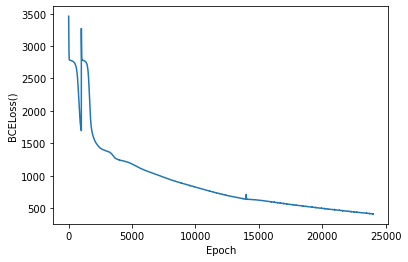

In [49]:
plt.plot(epoch_loss_list)
plt.xlabel('Epoch')
plt.ylabel(f"{criterion}")
plt.show()

In [53]:
print(
f"train ham accuracy: {sum(net(train_ham) > 0.5) / len(train_ham)}",
f"train spam accuracy: {sum(net(train_spam) < 0.5) / len(train_spam)}",
f"test ham accuracy: {sum(net(test_ham) > 0.5) / len(test_ham)}",
f"test spam accuracy: {sum(net(test_spam) < 0.5) / len(test_spam)}",
sep='\n'
)

train ham accuracy: tensor([0.9768])
train spam accuracy: tensor([0.9386])
test ham accuracy: tensor([0.8917])
test spam accuracy: tensor([0.7533])
